In [78]:
#author : Antonin Grateau
#date : 01/12/2021

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from math import *
import random as rd

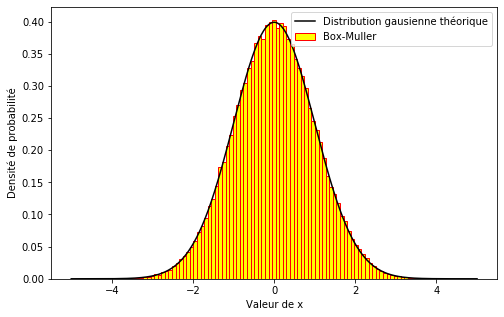

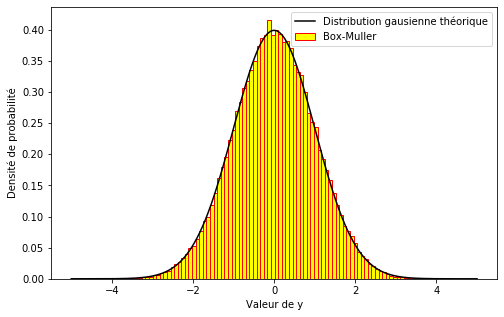

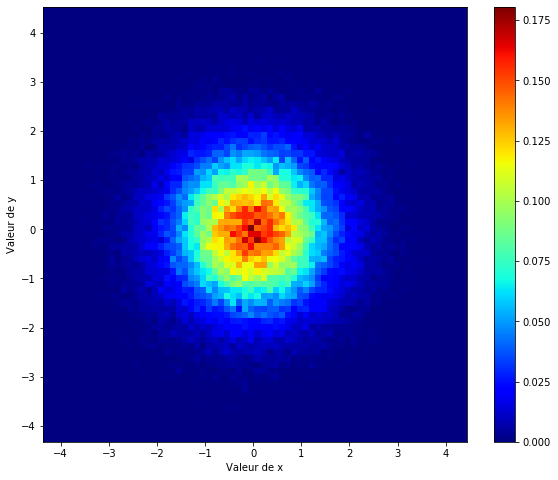

In [79]:
#Exercice 1 : Méthode de Box-Muller

#Génération des séquences des VAs
N = 100000

U = [rd.random() for i in range(N)]
V = [rd.random() for i in range(N)]

R = [(-2*log(u,e))**(1/2) for u in U]
THETA = [2*pi*v for v in V]

X = [r*cos(theta) for (r,theta) in zip(R,THETA)]
Y = [r*sin(theta) for (r,theta) in zip(R,THETA)]

#Tracé des gausiennes
plt.figure(figsize=(8,5))
plt.xlabel('Valeur de x')
plt.ylabel('Densité de probabilité')
plt.plot(np.linspace(-5,5,1000), [1/(2*pi)**(1/2)*exp(-r**2/2) for r in np.linspace(-5,5,1000)], color='black', label='Distribution gausienne théorique')
plt.hist(X, bins=100, density=True, color = 'yellow', edgecolor = 'red', label='Box-Muller')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.xlabel('Valeur de y')
plt.ylabel('Densité de probabilité')
plt.plot(np.linspace(-5,5,1000), [1/(2*pi)**(1/2)*exp(-r**2/2) for r in np.linspace(-5,5,1000)], color='black', label='Distribution gausienne théorique')
plt.hist(Y, bins=100, density=True, color = 'yellow', edgecolor = 'red', label='Box-Muller')
plt.legend()
plt.show()

#Tracé de l'histogramme 2D 
plt.figure(figsize=(9.5,8))
plt.hist2d(X, Y, bins=(70, 70), density=True, cmap=plt.cm.jet)
plt.xlabel('Valeur de x')
plt.ylabel('Valeur de y')
plt.colorbar()
plt.show()

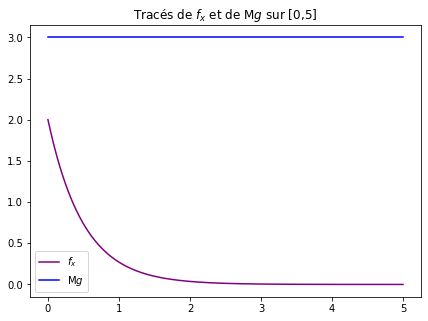

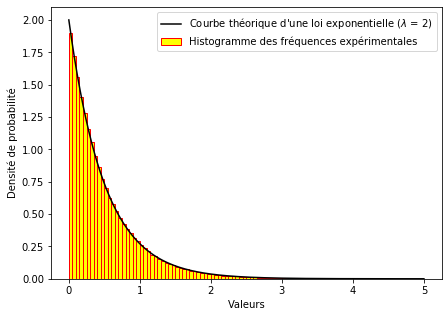

<Figure size 432x288 with 0 Axes>

In [80]:
#Exercice 2 : Méthode d'acceptation-rejet

M = 15
N = 1000

def f(x):
    return(2*exp(-2*x))

#On prend g la loi uniforme sur [0,5]
def g(x):
    return(1/5)

X = np.linspace(0,5,1000)
Y = [f(x) for x in X]
Z = [M*g(x) for x in X]
plt.figure(figsize=(7,5))
plt.plot(X,Y, color='purple', label='$f_x$')
plt.plot(X,Z, color='blue', label = 'M$g$')
plt.title('Tracés de $f_x$ et de M$g$ sur [0,5]') #Pour vérifier que M est bien chosi
plt.legend()
plt.show()

M = 15
N = 10000000
points_generes = []

for n in range(0,N):
    x = 5*rd.random()
    y = M*g(x)*rd.random()
    if y < f(x):
        points_generes.append(x)

#Tracé
plt.figure(figsize=(7,5))
plt.hist(points_generes, bins = 100, color = 'yellow', edgecolor = 'red',
         density=True, label='Histogramme des fréquences expérimentales')
plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
#plt.title("Simulation de la méthode d'acceptation-rejet")
plt.plot(X,Y, label="Courbe théorique d'une loi exponentielle ($\lambda$ = 2)", color='black')
plt.legend()
plt.show()
plt.savefig('acceptation-rejet')

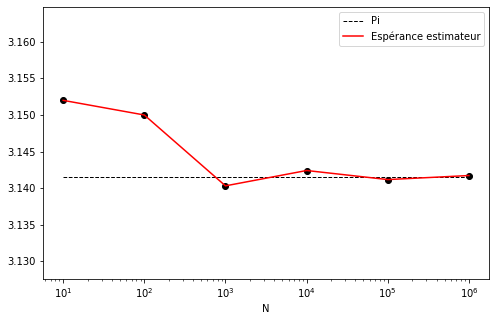

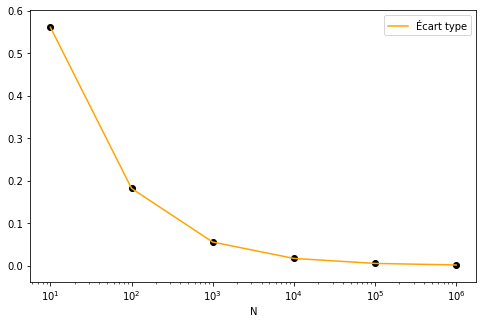

In [81]:
#Exercice 3

def g(x,y):
    if x**2+y**2 < 1:
        return(1)
    else: 
        return(0)
    
def estimateur(N):
    #Séquence de points aléatoires, distribution uniforme
    X = np.random.uniform(-1,1,N)
    Y = np.random.uniform(-1,1,N)

    valeur_moyenne_g = np.mean([g(x,y) for x,y in zip(X,Y)])
    estimateur = 4*valeur_moyenne_g 
    return(estimateur)

def statistiques_estimateur(N):
    M = 100
    datas = [estimateur(N) for i in range(M)] #On calcule l'estimateur M fois
    return(np.mean(datas), np.std(datas))

#Statistiques et tracés
N_values = np.logspace(1,6,6)
means = []
stds = []
for N in N_values:
    N = int(N)
    mean, std = statistiques_estimateur(N)
    means.append(mean)
    stds.append(std)
    
plt.figure(figsize=(8,5))
plt.scatter(N_values, means, color='black')
plt.plot(N_values, [pi for i in N_values], linestyle='--', linewidth=1, color='black', label='Pi')
plt.plot(N_values, means, color='red', label='Espérance estimateur')
plt.xscale('log')
plt.xlabel('N')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(N_values, stds, color='black')
plt.plot(N_values, stds, color='orange', label='Écart type')
plt.xscale('log')
plt.xlabel('N')
plt.legend()
plt.show()

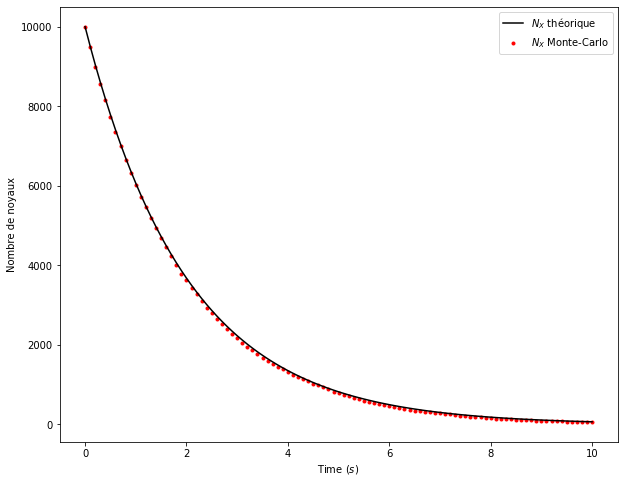

In [82]:
#Exercice 4, question 1

#Paramètres
N_0 = 10000
lamb = 1/2
ht = 10**(-1)
dp = lamb*ht
t_total = 10 
N = int(t_total/ht)

#Simulation
T = np.linspace(0,t_total,N+1) #Liste des temps
N_states = [N_0] #Initialisation de la liste des nombres de noyaux
for i in range(1,N+1):
    delta_N = 0
    for j in range(N_states[i-1]):
        random_mc = rd.random()
        if random_mc < dp:
            delta_N -= 1
    N_states.append(N_states[i-1] + delta_N)

#Tracé
plt.figure(figsize=(10,8))
plt.scatter(T, N_states, color='red', marker='.', label='$N_X$ Monte-Carlo')
plt.plot(T,[N_0*exp(-lamb*t) for t in T], color='black', label='$N_X$ théorique')
plt.xlabel('Time $(s)$')
plt.ylabel('Nombre de noyaux')
plt.legend()
plt.show()

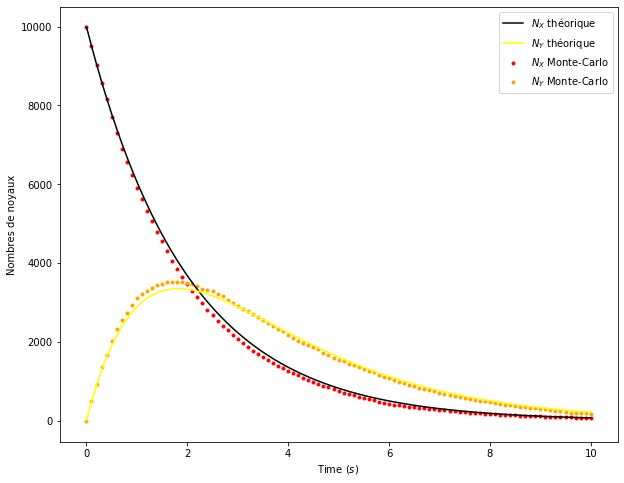

In [83]:
#Exercice 4, question 3

#Paramètres
N_0_x = 10000
lamb_x = 1/2
lamb_y = 3/5
ht = 10**(-1)
dp_x = lamb_x*ht
dp_y = lamb_y*ht
t_total = 10 
N = int(t_total/ht)

#Simulation
T = np.linspace(0,t_total,N+1) #Liste des temps
N_states_x = [N_0_x] #Initialisation de la liste des nombres de noyaux X
N_states_y = [0] #Initialisation de la liste des nombres de noyaux Y
for i in range(1,N+1):
    delta_N_x = 0
    delta_N_y = 0
    for j in range(N_states_x[i-1]):
        random_mc = rd.random()
        if random_mc < dp_x:
            delta_N_x -= 1
            delta_N_y += 1
    for j in range(N_states_y[i-1]):
        random_mc = rd.random()
        if random_mc < dp_y:
            delta_N_y -= 1
    N_states_x.append(N_states_x[i-1] + delta_N_x)
    N_states_y.append(N_states_y[i-1] + delta_N_y)
    
#Tracé
plt.figure(figsize=(10,8))
plt.scatter(T, N_states_x, color='red', marker='.', label='$N_X$ Monte-Carlo')
plt.scatter(T, N_states_y, color='orange', marker='.', label='$N_Y$ Monte-Carlo')
plt.plot(T,[N_0_x*exp(-lamb_x*t) for t in T], color='black', label='$N_X$ théorique')
plt.plot(T,[N_0_x*lamb_x/(lamb_y - lamb_x)*(exp(-lamb_x*t) - exp(-lamb_y*t)) for t in T], color='yellow', label='$N_Y$ théorique')

plt.xlabel('Time $(s)$')
plt.ylabel('Nombres de noyaux')
plt.legend()
plt.show()